In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.metrics import MeanAbsoluteError

In [2]:
import chardet

with open("Car_Purchasing_Data.csv", "rb") as f:
    result = chardet.detect(f.read())
    print(result)  


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [3]:
data = pd.read_csv("Car_Purchasing_Data.csv", encoding='ISO-8859-1') 


In [4]:

data.head()


,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [5]:
data.isnull().sum()

Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

In [6]:
data.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [7]:
data = data.drop(columns=['Customer Name','Customer e-mail','Country'])  


In [8]:
data


,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [9]:
X = data.drop('Car Purchase Amount', axis=1)

In [10]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [11]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [12]:
X

array([[-1.01207287, -0.55074911,  0.05857619,  0.57427133, -1.11046945],
       [-1.01207287, -0.67383422,  0.38657041, -0.0099515 ,  0.57392937],
       [ 0.98807114, -0.38750768, -0.71236095,  0.4454518 ,  1.19397625],
       ...,
       [ 0.98807114,  0.96624515,  0.57832106,  0.28802326,  1.92114437],
       [ 0.98807114,  1.62075409, -1.05333541,  1.26384749, -0.54019026],
       [ 0.98807114,  0.06140832, -0.06470949, -0.06205457,  0.18153098]])

In [13]:
y = data['Car Purchase Amount']

In [14]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[MeanAbsoluteError()])
model.summary()


C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape         ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ dense (Dense)               │ (None, 64)           │         384 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense_1 (Dense)             │ (None, 32)           │       2,080 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense_2 (Dense)             │ (None, 1)            │          33 │
└─────────────────────────────┴──────────────────────┴─────────────┘

 Total params: 2,497 (9.75 KB)

 Trainable params: 2,497 (9.75 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=300, batch_size=8)



Epoch 1/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 2141992576.0000 - mean_absolute_error: 45088.0273 - val_loss: 1938593792.0000 - val_mean_absolute_error: 42924.3867
Epoch 2/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2026177664.0000 - mean_absolute_error: 43564.0938 - val_loss: 1938311168.0000 - val_mean_absolute_error: 42921.0898
Epoch 3/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2120922880.0000 - mean_absolute_error: 44668.0117 - val_loss: 1937715200.0000 - val_mean_absolute_error: 42914.2383
Epoch 4/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2078360064.0000 - mean_absolute_error: 44150.4766 - val_loss: 1936610944.0000 - val_mean_absolute_error: 42901.6172
Epoch 5/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2209525760.0000 - mean_absolute_error: 45650.0938 - val_loss: 1934752128.0000 - val_mean_absolute_error: 42880.6445
Epoch 6/300
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2102925696.0000 - mean_absolute_error: 44267.8867 - val_loss: 193

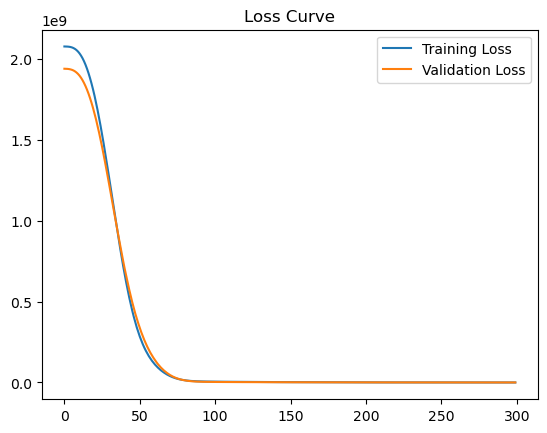

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

In [19]:
predictions = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': predictions.flatten()})
print(comparison.head())


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
        Actual     Predicted
0  46082.80993  45943.617188
1  45058.89690  45022.949219
2  63079.84329  63177.238281
3  31837.22537  31995.189453
4  60461.24268  60386.027344


In [20]:
model.save('car_purchase_amount_model.keras')



In [21]:
X

array([[-1.01207287, -0.55074911,  0.05857619,  0.57427133, -1.11046945],
       [-1.01207287, -0.67383422,  0.38657041, -0.0099515 ,  0.57392937],
       [ 0.98807114, -0.38750768, -0.71236095,  0.4454518 ,  1.19397625],
       ...,
       [ 0.98807114,  0.96624515,  0.57832106,  0.28802326,  1.92114437],
       [ 0.98807114,  1.62075409, -1.05333541,  1.26384749, -0.54019026],
       [ 0.98807114,  0.06140832, -0.06470949, -0.06205457,  0.18153098]])

In [25]:
from keras.saving import load_model
import numpy as np

# Load the model
loaded_model = load_model('car_purchase_amount_model.keras')
scaler = joblib.load('scaler.pkl')
# Prepare input data
input_data = np.array([0, 41, 62812.1, 11609, 238961]).reshape(1,-1)

input_data_scaled = scaler.transform(input_data)
prediction = loaded_model.predict(input_data_scaled)
print(f"Predicted Amount: ${prediction[0][0]:,.2f}")

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
Predicted Amount: $34,282.68


In [23]:
input_data_scaled

array([[-1.01207287e+00, -6.57603050e-01,  5.85767860e-02,
         9.31926531e+01, -1.11047090e+00]])

In [24]:
0	41.851720	62812.09301	11609.380910	238961.2505






















SyntaxError: invalid syntax (3846866806.py, line 1)